Original Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Missing values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country    

/tmp/ipython-input-1483869653.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1483869653.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or


Prepared Data (United Kingdom):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  


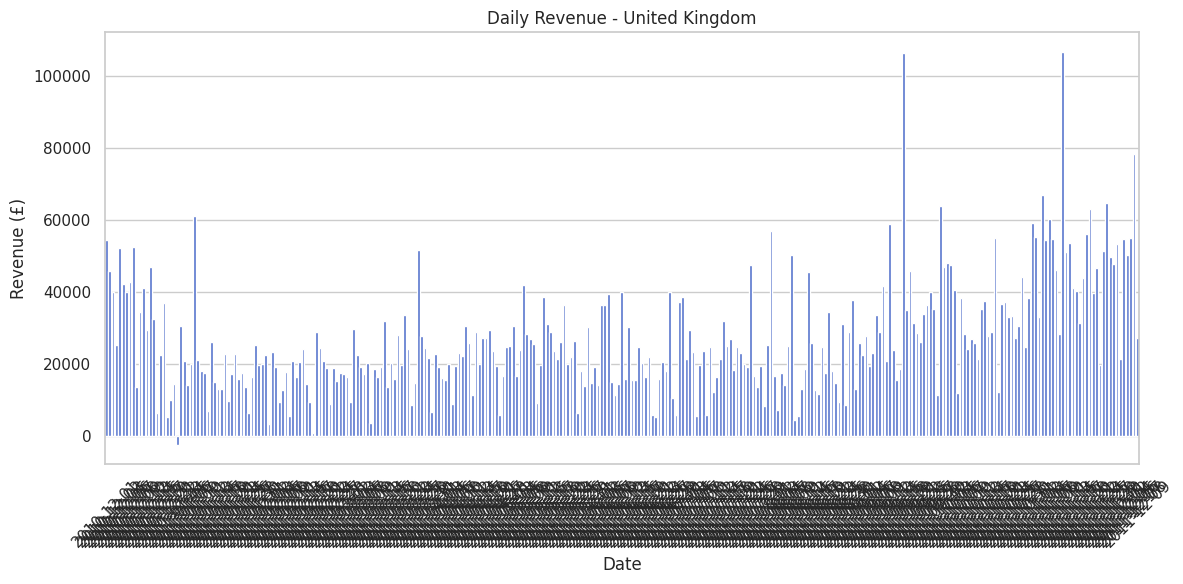

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('ecommerce-data.csv', encoding='ISO-8859-1')
print("Original Data:")
print(df.head())
print("\nMissing values before cleaning:")
print(df.isnull().sum())
# Fill missing CustomerID with 0, others with mode or mean as appropriate
df['CustomerID'].fillna(0, inplace=True)
df.dropna(subset=['Description'], inplace=True)
df['Quantity'].fillna(0, inplace=True)
df['UnitPrice'].fillna(df['UnitPrice'].mean(), inplace=True)
# Step 4: Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Step 5: Filter for a specific country (e.g., United Kingdom)
df_uk = df[df['Country'] == 'United Kingdom'].copy()

# Step 6: Create new column: Total Revenue
df_uk['Revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']

# Step 7: View prepared data
print("\nPrepared Data (United Kingdom):")
print(df_uk.head())
# Optional: Group by date for daily revenue
df_uk['InvoiceDay'] = df_uk['InvoiceDate'].dt.date
daily_revenue = df_uk.groupby('InvoiceDay')['Revenue'].sum().reset_index()
# Visualization: Daily Revenue for United Kingdom
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_revenue, x='InvoiceDay', y='Revenue', color="royalblue")
plt.xticks(rotation=45)
plt.title('Daily Revenue - United Kingdom')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.tight_layout()
plt.show()
# Interactive Visualization
fig = px.line(daily_revenue, x='InvoiceDay', y='Revenue',
              title='Daily Revenue - United Kingdom',
              markers=True,
              labels={'InvoiceDay': 'Date', 'Revenue': 'Revenue (£)'})
fig.show()